In [1]:
import scipy.stats
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
priors1 = {
    "captive_time": scipy.stats.lognorm(s=0.7, loc=0, scale=np.exp(3)),
    "div_time": scipy.stats.lognorm(s=1, loc=0, scale=50000),
    "div_time_dom": scipy.stats.lognorm(s=0.4, loc=1000, scale=2500),
    "div_time_scot": scipy.stats.lognorm(s=0.2, loc=0, scale=3000),
    "mig_rate_captive": scipy.stats.lognorm(s=0.5, loc=0, scale=0.08),
    "mig_rate_scot": scipy.stats.lognorm(s=0.5, loc=0, scale=0.08),
    "mig_length_scot": scipy.stats.lognorm(s=0.7, loc=0, scale=np.exp(3)),
    "pop_size_captive": scipy.stats.lognorm(s=0.5, loc=10, scale=100),
    "pop_size_domestic_1": scipy.stats.lognorm(s=1, loc=0, scale=50000),
    "pop_size_lyb_1": scipy.stats.lognorm(s=1, loc=0, scale=20000),
    "pop_size_lyb_2": scipy.stats.lognorm(s=1, loc=0, scale=80000),
    "pop_size_scot_1": scipy.stats.lognorm(s=0.8, loc=0, scale=np.exp(8)),
    "pop_size_eu_1": scipy.stats.lognorm(s=1, loc=0, scale=10000),
    "pop_size_eu_2": scipy.stats.lognorm(s=1, loc=0, scale=40000),
    "mutation_rate": scipy.stats.lognorm(s=1, loc=0, scale=1e-8),
    "recombination_rate": scipy.stats.lognorm(s=0.5, loc=1e-8, scale=5.0e-9)
}

In [22]:
dist1 = scipy.stats.lognorm(s=0.5, loc=1e-8, scale=5.0e-9)
x = dist1.rvs(10000)
dist2 = scipy.stats.lognorm(s=0.5, loc=0.4e-8, scale=9e-9)
y = dist2.rvs(10000)

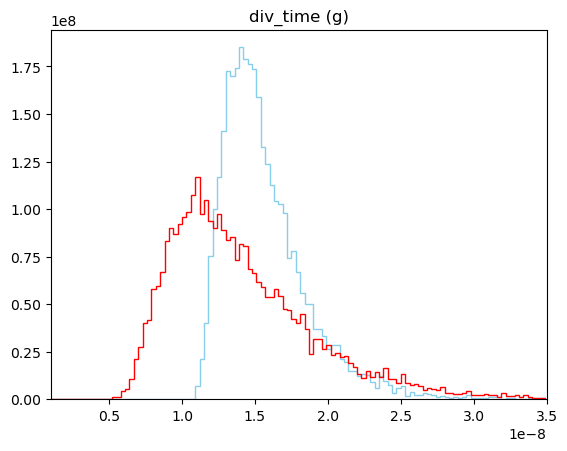

In [23]:
import matplotlib.pyplot as plt
plt.hist(x, bins=np.arange(0.1e-8, 3.5e-8, 3e-10), color = "skyblue", ec="skyblue",density=True, histtype='step')
plt.hist(y, bins=np.arange(0.1e-8, 3.5e-8, 3e-10), color = "red", ec="red",density=True, histtype='step')
plt.xlim([0.1e-8, 3.5e-8])
plt.title("div_time (g)")
plt.show()

In [48]:
#new
priors2 = {
    "captive_time": scipy.stats.lognorm(s=0.7, loc=0, scale=np.exp(3)),
    "div_time": scipy.stats.lognorm(s=0.7, loc=10000, scale=60000),
    "div_time_dom": scipy.stats.lognorm(s=0.5, loc=500, scale=3000),
    "div_time_scot": scipy.stats.lognorm(s=0.3, loc=0, scale=3000),
    "mig_rate_captive": scipy.stats.lognorm(s=1, loc=0, scale=0.07),
    "mig_rate_scot": scipy.stats.lognorm(s=1, loc=0, scale=0.07),
    "mig_length_scot": scipy.stats.lognorm(s=0.7, loc=0, scale=np.exp(3)),
    "pop_size_captive": scipy.stats.lognorm(s=0.6, loc=0, scale=100),
    "pop_size_domestic_1": scipy.stats.lognorm(s=1, loc=0, scale=60000),
    "pop_size_lyb_1": scipy.stats.lognorm(s=1, loc=0, scale=20000),
    "pop_size_lyb_2": scipy.stats.lognorm(s=1.5, loc=5000, scale=100000),
    "pop_size_scot_1": scipy.stats.lognorm(s=1, loc=0, scale=4000),
    "pop_size_eu_1": scipy.stats.lognorm(s=1.3, loc=0, scale=20000),
    "pop_size_eu_2": scipy.stats.lognorm(s=1, loc=0, scale=60000),
    "mutation_rate": scipy.stats.lognorm(s=1, loc=0, scale=1e-8),
    "recombination_rate": scipy.stats.lognorm(s=0.5, loc=0.4e-8, scale=9e-9)
}

In [49]:
theta1 = []
for key, prior in priors1.items():
    theta1.append(prior.rvs(10000))
theta1 = np.concatenate(theta1, axis=0)
print(np.shape(theta1))
theta1 = np.reshape(theta1, (16,10000))
print(np.shape(theta1))

(160000,)
(16, 10000)


In [50]:
theta2 = []
for key, prior in priors2.items():
    theta2.append(prior.rvs(10000))
theta2 = np.concatenate(theta2, axis=0)
print(np.shape(theta2))
theta2 = np.reshape(theta2, (16,10000))
print(np.shape(theta2))

(160000,)
(16, 10000)


In [53]:
lims = [[0, 100],
        [0, 500000],
        [500, 11000],
        [1000, 6000],
        [0, 0.4],
        [0, 0.3],
        [0, 80],
        [0, 500],
        [0, 500000],
        [0, 100000],
        [0, 750000],
        [0, 20000],
        [0, 100000],
        [0, 300000],
        [0, 1e-7],
        [0.5e-8, 3.5e-8]]

bins = [[120,100],
        [400,300],
        [100,100],
        [100,100],
        [100,500],
        [100,500],
        [200,100],
        [100,100],
        [300,400],
        [500,600],
        [400,1000],
        [500,600],
        [500,600],
        [300,400],
        [200,300],
        [100,200]]

names = ["captive_time",
        "div_time",
        "div_time_dom",
        "div_time_scot",
        "mig_rate_captive",
        "mig_rate_scot",
        "mig_length_scot",
        "pop_size_captive",
        "pop_size_domestic_1",
        "pop_size_lyb_1",
        "pop_size_lyb_2",
        "pop_size_scot_1",
        "pop_size_eu_1",
        "pop_size_eu_2",
        "mutation_rate",
        "recombination_rate"
        ]

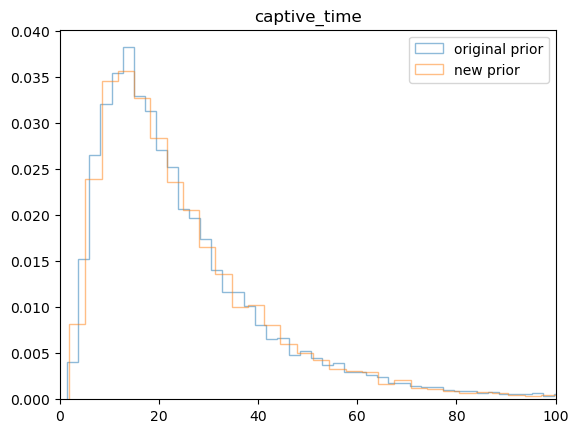

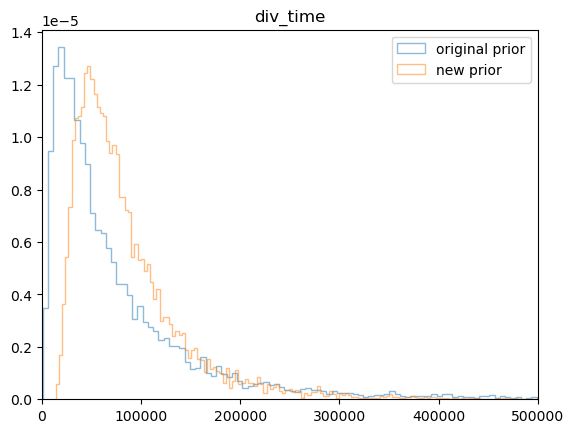

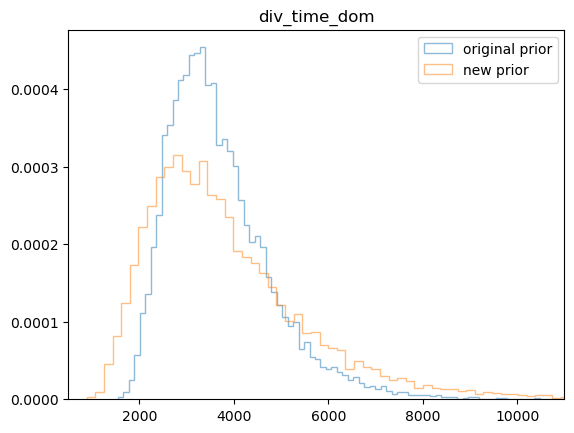

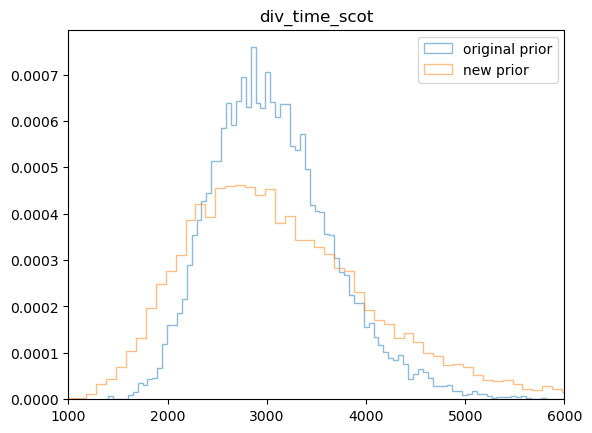

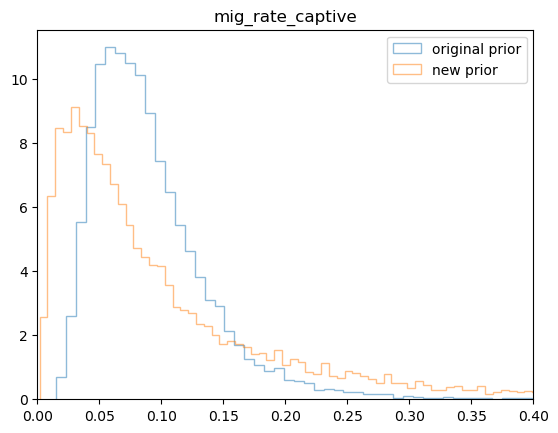

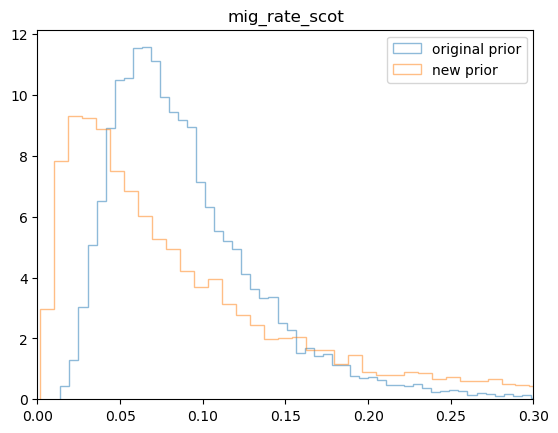

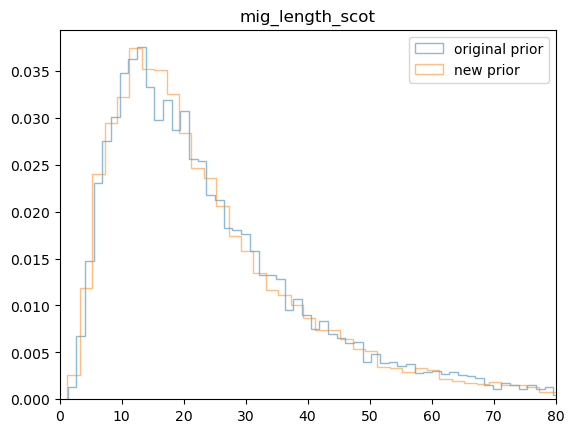

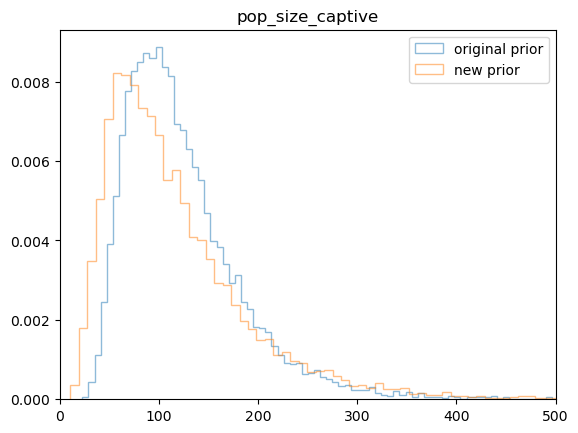

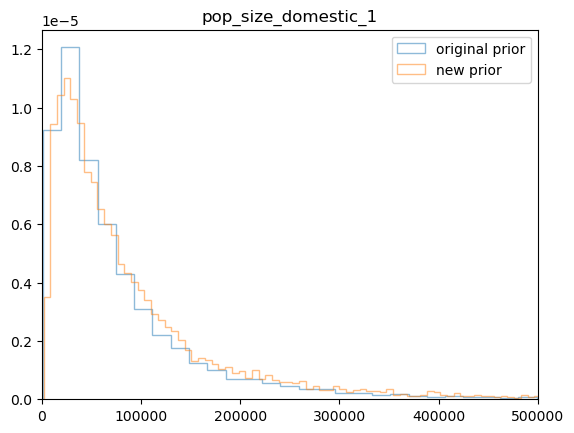

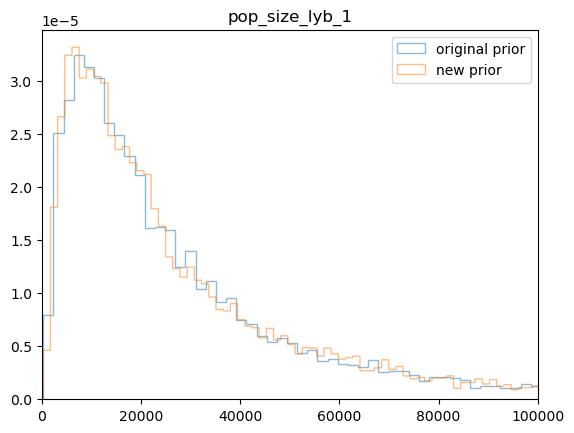

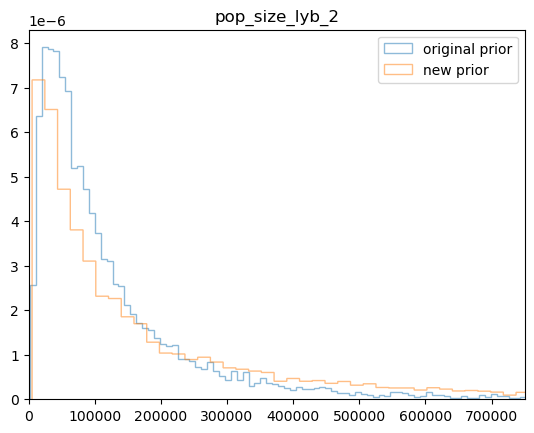

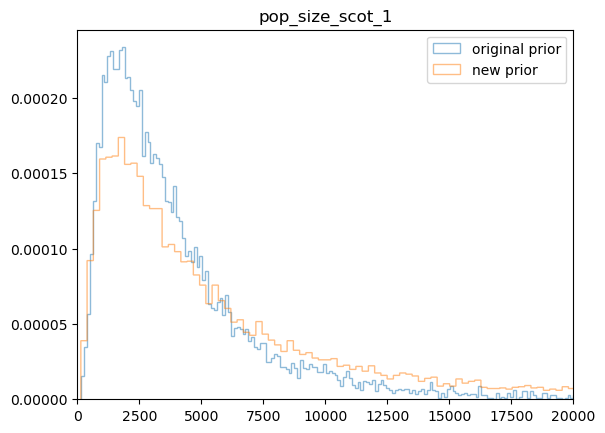

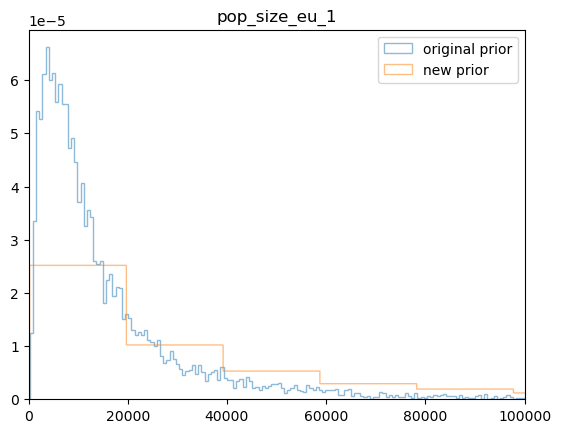

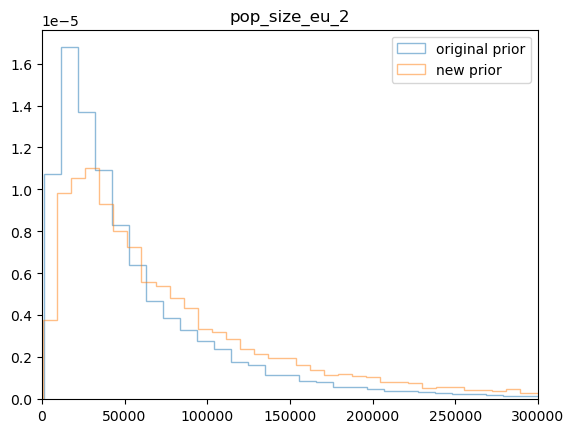

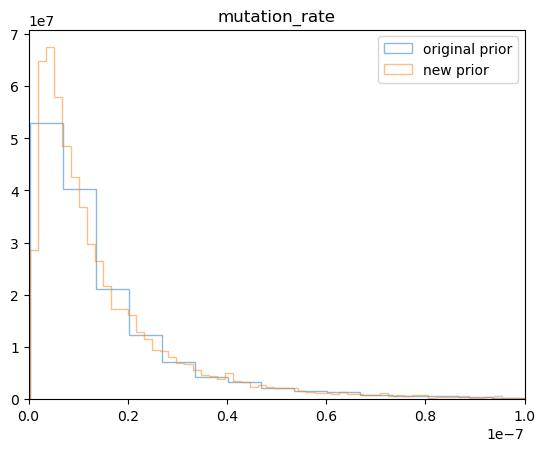

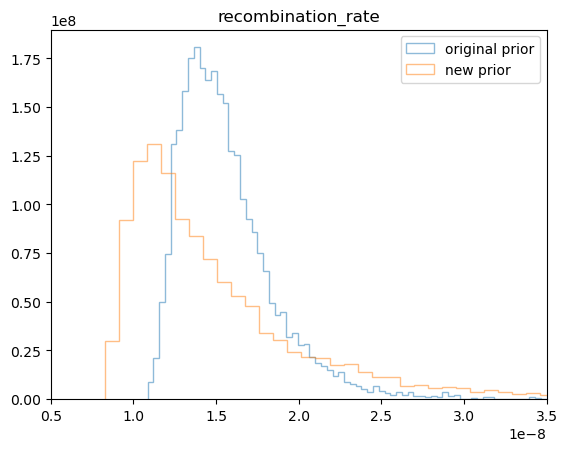

In [54]:
for num in range(0,16):  
    plt.hist(theta1[num][:],
             alpha=0.5,
             label='original prior', bins=bins[num][0], density=True, histtype='step')
    
    plt.hist(theta2[num][:],
             alpha=0.5,
             label='new prior', bins=bins[num][1], density=True, histtype='step')

    plt.legend(loc='upper right')
    plt.title(names[num])
    #plt.yticks([])
    plt.xlim(lims[num])
    plt.show()

In [19]:
prior_dict= {
    "div_time_scot":5,
    "captive_time":6,
    "div_time":7,
    "div_time_dom":6}

In [14]:
from utils import check_priors

def check_priors(prior_dict):
    
    if (prior_dict["div_time_scot"] > prior_dict["captive_time"] and
    prior_dict["div_time"] > prior_dict["div_time_scot"] and
    prior_dict["div_time"] > prior_dict["div_time_dom"]):
        return True
    else:
        return False

In [ ]:
while check_priors(prior_dict) == False:
    samples = []
    for key, prior in priors.items():
        samples.append(float(prior.rvs(1)))

    prior_dict = dict(zip(priors.keys(),samples))
    

In [20]:
check_priors(prior_dict)

False

In [29]:
torch.zeros(1)*16

tensor([0.])

In [31]:
from torch.distributions import Normal
from sbi.utils import process_prior
from torch.distributions import MultivariateNormal
#norm_prior = MultivariateNormal(loc=torch.zeros(16), scale_tril=torch.diag(torch.ones(16)))
norm_prior = Normal(torch.zeros(1), torch.ones(1))
prior, *_ = process_prior(norm_prior)  # Keeping only the first return.

In [30]:
torch.ones(1)*16

tensor([16.])

In [ ]:
norm

In [27]:
norm = norm_prior.sample((100,))
mult = dist2.sample((100000,))

In [ ]:
import matplotlib.pyplot as plt
plt.hist(norm, 
         alpha=0.5, # the transaparency parameter
         label='1', bins=300)
  
plt.hist(mult[:,15], alpha=0.5, label='2', bins=300)
  
plt.legend(loc='upper right')
#plt.xlim([0, 9e-8])
plt.show()